# 영문 워드 클라우드

In [1]:
# NLTK(Natural Language Toolkit)
import nltk

In [2]:
# NLTK에서 사용하는 데이터는 다운로드 받아야 함
# VS Code: 1회 다운받으면 됨
# Colab: 접속할 때 마다 다운받아야 함
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

- Stopwords 처리

In [11]:
# NLTK Stopwords
from nltk.corpus import stopwords
sw_nltk = stopwords.words('english')
print(sw_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [5]:
# WordCloud에서 제공하는 불용어(stopwords)
sw_wc = STOPWORDS
print(sw_wc)

{"i've", 'just', 'own', "she'll", "they'll", "he's", 'what', 'your', 'since', 'also', 'both', 'yours', 'until', 'when', "you'll", 'not', 'did', "we've", 'more', 'his', 'any', 'before', 'doing', 'against', 'being', 'below', 'com', "i'd", "we're", 'again', "weren't", "where's", 'so', 'here', 'on', 'how', 'are', 'like', 'we', 'were', 'can', 'i', 'to', 'otherwise', 'its', "you'd", "you're", 'in', 'only', 'ourselves', 'could', "she's", 'yourself', 'out', 'an', "don't", 'while', 'off', "they're", 'whom', 'myself', 'with', 'few', 'herself', 'have', 'himself', 'then', "you've", "couldn't", 'http', 'why', 'very', "didn't", 'does', 'been', 'her', 'but', "they'd", "can't", 'is', 'therefore', 'yourselves', 'from', 'into', 'get', 'some', 'where', 'which', 'having', "how's", "doesn't", 'itself', 'once', 'as', 'else', 'should', 'them', "i'm", "what's", 'however', 'these', 'they', 'our', 'at', 'during', 'has', "shouldn't", "hasn't", 'who', "when's", 'a', "won't", 'theirs', 'down', "haven't", 'if', 'wo

In [6]:
len(sw_nltk), len(sw_wc)

(179, 192)

- Alice in Wonderland

In [9]:
with open('data/Alice.txt') as file:
    text = file.read()

In [10]:
# stopwords에 'said' 단어 추가
sw_wc.add('said')

In [12]:
wc = WordCloud(background_color='white',
                max_words=2000, stopwords=sw_wc)
wc = wc.generate(text)

In [13]:
count = 0
for key, val in wc.words_.items():
    print(key, ':', val)
    count += 1
    if count > 10:
        break

Alice : 1.0
little : 0.29508196721311475
one : 0.27595628415300544
know : 0.2459016393442623
went : 0.226775956284153
thing : 0.2185792349726776
time : 0.2103825136612022
Queen : 0.20765027322404372
see : 0.1830601092896175
King : 0.17486338797814208
well : 0.1721311475409836


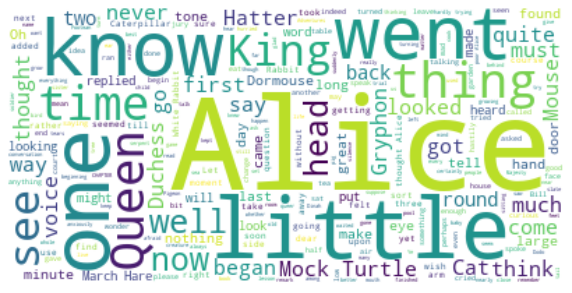

In [14]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

- 그림 위에 표시하기

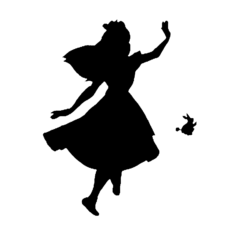

In [15]:
mask = np.array(Image.open('data/Alice_mask.png'))
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
wc = WordCloud(background_color='white', mask=mask,
                max_words=1000, stopwords=sw_wc).generate(text)

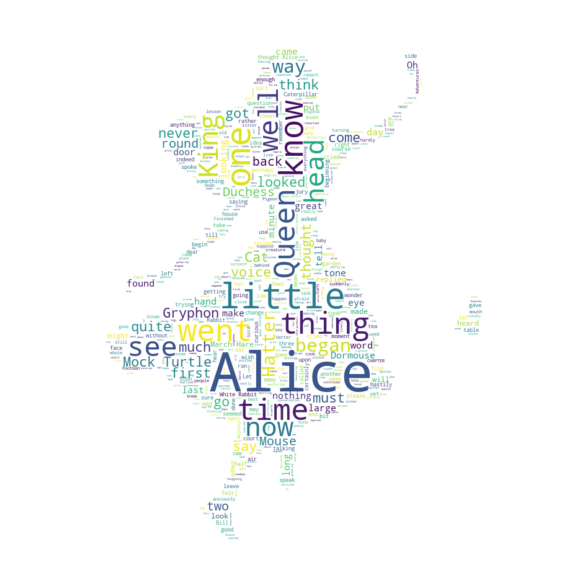

In [18]:
plt.figure(figsize=(10,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### 3. Star Wars

In [19]:
with open('data/A_new_hope.txt') as file:
    text = file.read()
text = text.replace('HAN', 'Han').replace("LUKE'S", 'Luke')

In [22]:
sw = STOPWORDS
sw.add('int')
sw.add('ext')
len(sw)

195

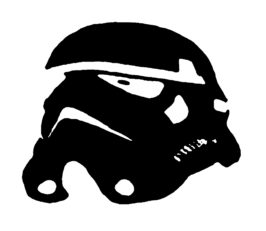

In [23]:
mask = np.array(Image.open('data/Stormtrooper_mask.png'))
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
wc = WordCloud(mask=mask, max_words=1000, stopwords=sw,
                margin=10, random_state=2022).generate(text)
default_colors = wc.to_array

In [25]:
# HSL: hue, saturation, lightness
def grey_color(word, font_size, position, orientation, random_state, **kwargs):
    return f'hsl(0,0%,{np.random.randint(60,101)}%)'

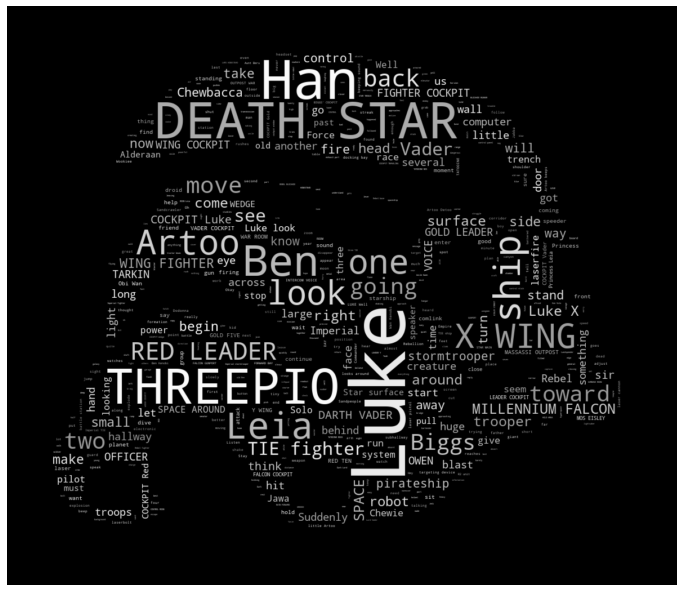

In [26]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color, random_state=2022),
            interpolation='bilinear')
plt.axis('off')
plt.show()